In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Transactions = pd.read_excel('KPMG_Data.xlsx',sheet_name=0)
Demographic = pd.read_excel('KPMG_Data.xlsx',sheet_name=1)
New_customer = pd.read_excel('KPMG_Data.xlsx',sheet_name=2)
Address = pd.read_excel('KPMG_Data.xlsx',sheet_name=3)

In [3]:
Transactions.head()

,Unnamed: 0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
4,4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82


In [7]:
Address.drop('Unnamed: 0',axis=1,inplace=True)

In [55]:
Demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,todays date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,Yes,11,66,2020-07-11
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,False,Yes,16,39,2020-07-11
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,False,Yes,15,66,2020-07-11
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,False,No,7,58,2020-07-11
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,False,Yes,13,53,2020-07-11


In [52]:
New_customer.drop('Unnamed: 0',axis=1,inplace=True)

## Transactions

In [56]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82


In [57]:
Transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,Profit
count,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000
mean,9989.257393,45.797737,1739.467267,0.500849,1107.337193,555.585260,551.751933
std,5779.669087,30.571996,1011.889153,0.500012,582.662400,405.596541,493.211843
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,4.800000
25%,4976.000000,18.000000,857.000000,0.000000,575.270000,215.140000,133.780000
50%,9985.000000,45.000000,1741.000000,1.000000,1163.890000,507.580000,445.210000
75%,14997.000000,72.000000,2615.000000,1.000000,1635.300000,795.100000,830.240000
max,20000.000000,100.000000,5034.000000,1.000000,2091.470000,1759.850000,1702.550000


In [8]:
# Joining Transactions and Demographic
Join = pd.merge(Transactions, Demographic, on='customer_id', how='inner')

In [9]:
list(Join)

['transaction_id',
 'product_id',
 'customer_id',
 'transaction_date',
 'online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'list_price',
 'standard_cost',
 'product_first_sold_date',
 'Profit',
 'first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'age',
 'todays date']

In [10]:
Join.drop(['transaction_date','order_status','product_first_sold_date','job_title','todays date','deceased_indicator'
           ,'list_price','standard_cost'],axis=1,inplace=True)

In [11]:
Join.head()

,transaction_id,product_id,customer_id,online_order,brand,product_line,product_class,product_size,Profit,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age
0,1,2,2950,0,Solex,Standard,medium,medium,17.87,Kristos,Anthony,Male,19,1955-01-11,Financial Services,Mass Customer,Yes,10,65
1,11065,1,2950,0,Giant Bicycles,Standard,medium,medium,448.68,Kristos,Anthony,Male,19,1955-01-11,Financial Services,Mass Customer,Yes,10,65
2,18923,62,2950,0,Solex,Standard,medium,medium,179.44,Kristos,Anthony,Male,19,1955-01-11,Financial Services,Mass Customer,Yes,10,65
3,2,3,3120,1,Trek Bicycles,Standard,medium,large,1702.55,Lauree,O'Donnell,Female,89,1979-02-04,Health,Mass Customer,Yes,10,41
4,6862,4,3120,0,Giant Bicycles,Standard,high,medium,451.65,Lauree,O'Donnell,Female,89,1979-02-04,Health,Mass Customer,Yes,10,41


In [12]:
Join.drop(['first_name','last_name'],axis=1,inplace=True)

In [13]:
Join.head()

,transaction_id,product_id,customer_id,online_order,brand,product_line,product_class,product_size,Profit,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age
0,1,2,2950,0,Solex,Standard,medium,medium,17.87,Male,19,1955-01-11,Financial Services,Mass Customer,Yes,10,65
1,11065,1,2950,0,Giant Bicycles,Standard,medium,medium,448.68,Male,19,1955-01-11,Financial Services,Mass Customer,Yes,10,65
2,18923,62,2950,0,Solex,Standard,medium,medium,179.44,Male,19,1955-01-11,Financial Services,Mass Customer,Yes,10,65
3,2,3,3120,1,Trek Bicycles,Standard,medium,large,1702.55,Female,89,1979-02-04,Health,Mass Customer,Yes,10,41
4,6862,4,3120,0,Giant Bicycles,Standard,high,medium,451.65,Female,89,1979-02-04,Health,Mass Customer,Yes,10,41


In [14]:
Join = pd.merge(Join,Address,on='customer_id', how='inner')

In [15]:
list(Join)

['transaction_id',
 'product_id',
 'customer_id',
 'online_order',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'Profit',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_industry_category',
 'wealth_segment',
 'owns_car',
 'tenure',
 'age',
 'address',
 'postcode',
 'state',
 'country',
 'property_valuation']

In [16]:
Join.head()

,transaction_id,product_id,customer_id,online_order,brand,product_line,product_class,product_size,Profit,gender,...,job_industry_category,wealth_segment,owns_car,tenure,age,address,postcode,state,country,property_valuation
0,1,2,2950,0,Solex,Standard,medium,medium,17.87,Male,...,Financial Services,Mass Customer,Yes,10,65,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,0,Giant Bicycles,Standard,medium,medium,448.68,Male,...,Financial Services,Mass Customer,Yes,10,65,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,0,Solex,Standard,medium,medium,179.44,Male,...,Financial Services,Mass Customer,Yes,10,65,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,1,Trek Bicycles,Standard,medium,large,1702.55,Female,...,Health,Mass Customer,Yes,10,41,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,0,Giant Bicycles,Standard,high,medium,451.65,Female,...,Health,Mass Customer,Yes,10,41,4 Shopko Circle,2196,NSW,Australia,5


In [17]:
Join.drop(['DOB','country'],axis=1,inplace=True)

In [18]:
list(Join)

['transaction_id',
 'product_id',
 'customer_id',
 'online_order',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'Profit',
 'gender',
 'past_3_years_bike_related_purchases',
 'job_industry_category',
 'wealth_segment',
 'owns_car',
 'tenure',
 'age',
 'address',
 'postcode',
 'state',
 'property_valuation']

In [69]:
Join.groupby('gender')['Profit'].mean()

gender
Female    541.980029
Male      557.752249
Name: Profit, dtype: float64

In [70]:
Join.groupby('gender')['past_3_years_bike_related_purchases'].mean()

gender
Female    48.028043
Male      49.763124
Name: past_3_years_bike_related_purchases, dtype: float64

In [71]:
Join.groupby('job_industry_category')['past_3_years_bike_related_purchases'].mean()

job_industry_category
Argiculture           51.937388
Entertainment         45.944606
Financial Services    49.010753
Health                50.351270
IT                    48.203540
Manufacturing         48.367105
Property              49.313301
Retail                48.747381
Telecommunications    41.897436
Name: past_3_years_bike_related_purchases, dtype: float64

In [72]:
Join.groupby('wealth_segment')['past_3_years_bike_related_purchases'].mean()

wealth_segment
Affluent Customer    49.803562
High Net Worth       48.413810
Mass Customer        48.665238
Name: past_3_years_bike_related_purchases, dtype: float64

In [73]:
Join.groupby('job_industry_category')['Profit'].mean()

job_industry_category
Argiculture           537.685581
Entertainment         554.238936
Financial Services    561.064632
Health                541.077707
IT                    541.761711
Manufacturing         544.979474
Property              548.613349
Retail                560.655838
Telecommunications    531.801823
Name: Profit, dtype: float64

In [74]:
Join.groupby('wealth_segment')['Profit'].mean()

wealth_segment
Affluent Customer    554.302370
High Net Worth       546.623773
Mass Customer        549.059745
Name: Profit, dtype: float64

In [75]:
Join.groupby('owns_car')['past_3_years_bike_related_purchases'].mean()

owns_car
No     48.690960
Yes    49.064295
Name: past_3_years_bike_related_purchases, dtype: float64

In [76]:
Join.groupby('owns_car')['Profit'].mean()

owns_car
No     541.217055
Yes    558.028582
Name: Profit, dtype: float64

In [77]:
Join.owns_car.value_counts()

Yes    8010
No     7821
Name: owns_car, dtype: int64

In [22]:
Join.groupby(['job_industry_category','owns_car','wealth_segment','Experience','tenure'])['Profit'].mean().sort_values()

job_industry_category  owns_car  wealth_segment     Experience   tenure
Manufacturing          No        High Net Worth     Senior       19         44.8550
IT                     Yes       Mass Customer      Experienced  20         50.6600
Telecommunications     Yes       High Net Worth     Senior       14        106.5275
IT                     No        Mass Customer      Junior       7         110.2850
Property               No        Affluent Customer  Fresher      3         126.6700
                                                                             ...   
Telecommunications     Yes       Mass Customer      Experienced  18             NaN
                                                                 19             NaN
                                                                 20             NaN
                                                                 21             NaN
                                                                 22             NaN
Name

In [20]:
bin_names=['Teen','Young','Man','Retired']
bin_edges=(10,20,35,60,100)
Join['Life-Stage'] = pd.cut(Join['age'],bin_edges,labels=bin_names)

In [21]:
bin_names=['Fresher','Junior','Senior','Experienced']
bin_edges=(0,5,9,19,30)
Join['Experience'] = pd.cut(Join['tenure'],bin_edges,labels=bin_names)

### Created the Life-Stage and Experience columns using pd.cut

In [107]:
#Copying the df
Join1 = Join.copy()

In [108]:
#Filtering according to above analysis
a = Join1[Join1['job_industry_category'] == 'Telecommunication']

In [109]:
a = a[a['owns_car'] == 'No']

In [110]:
Category = ['High Net Worth','Mass Customer']
a = a[a['wealth_segment'].isin(Category)]

In [112]:
b = Join1[Join1['job_industry_category'] == 'IT']

In [113]:
b = b[b['owns_car'] == 'No']

In [114]:
Category = ['Affluent Customer','Mass Customer']
b = b[b['wealth_segment'].isin(Category)]

In [115]:
c = Join1[Join1['job_industry_category'] == 'Retail']

In [117]:
c = c[c['owns_car'] == 'No']

In [119]:
c = c[c['wealth_segment'] == 'Mass Customer']

In [149]:
Join2 = pd.concat([a,b])

In [150]:
Join2.shape

(236, 14)

In [151]:
Join2 = pd.concat([Join2,c])

In [127]:
d = Join1[Join1['job_industry_category'] == 'Entertainment']

In [128]:
d = d[d['owns_car'] == 'No']

In [129]:
d = d[d['wealth_segment'] == ' Affluent Customer ']

In [130]:
e = Join1[Join1['job_industry_category'] == 'Entertainment']

In [131]:
e = e[e['owns_car'] == 'Yes']

In [132]:
e = e[e['wealth_segment'] == ' Mass Customer ']

In [152]:
Join2 = pd.concat([Join2,d])

In [153]:
Join2 = pd.concat([Join2,e])

In [154]:
Join2.shape

(700, 14)

In [137]:
f = Join1[Join1['job_industry_category'] == 'Property']

In [138]:
f = f[f['owns_car'] == 'Yes']

In [139]:
f = f[f['wealth_segment'] == 'Affluent Customer']

In [155]:
Join2 = pd.concat([Join2,f])

In [141]:
g = Join1[Join1['job_industry_category'] == 'Financial Services']

In [142]:
g = g[g['owns_car'] == 'Yes']

In [143]:
g = g[g['wealth_segment'] == 'High Net Worth']

In [156]:
Join2 = pd.concat([Join2,g])

In [145]:
Join2.shape

(1339, 14)

In [146]:
Join2.groupby(['Life-Stage','Experience'])['Profit'].mean()

Life-Stage  Experience 
Teen        Fresher        608.230690
            Junior                NaN
            Senior                NaN
            Experienced           NaN
Young       Fresher        517.818244
            Junior         662.717400
            Senior         633.304082
            Experienced    741.451538
Man         Fresher        533.916739
            Junior         604.867550
            Senior         599.775933
            Experienced    692.271053
Retired     Fresher        523.501429
            Junior         613.991935
            Senior         633.499048
            Experienced    602.760476
Name: Profit, dtype: float64

In [157]:
Exp = ['Senior','Experienced']
a = Join2[(Join2['Life-Stage'] == 'Young') & (Join2['Experience'].isin(Exp))]

In [158]:
b = Join2[(Join2['Life-Stage'] == 'Man') & (Join2['Experience'] == 'Experienced')]

In [159]:
c = Join2[(Join2['Life-Stage'] == 'Retired') & (Join2['Experience'] == 'Senior')]

In [161]:
Join3 = pd.concat([a,b])

In [162]:
Join3 = pd.concat([Join3,c])

Join3.shape

In [164]:
Join3.Profit.mean()

656.4552023121381

## Factors for shortlisting customers
 -  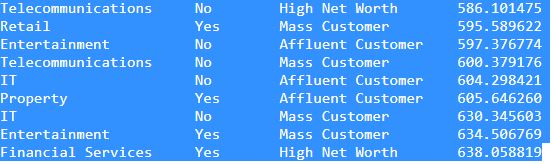

 - Young: Junior and Senior and Experienced
 - Man : Experienced
 - Retired: Senior

In [165]:
Target = New_customer.copy()

In [176]:
list(Target)

['first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'address',
 'postcode',
 'state',
 'country',
 'property_valuation',
 'Rank',
 'Value',
 'Age',
 "Today's Date",
 'Life-Stage',
 'Experience']

In [167]:
for name in list(Target):
    print(sum(Target[name].isnull()))

0
23
0
0
0
83
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [174]:
#Creating new column for Life-Stage and Experience
bin_names=['Teen','Young','Man','Retired']
bin_edges=(10,20,35,60,100)
Target['Life-Stage'] = pd.cut(Target['Age'],bin_edges,labels=bin_names)

In [175]:
bin_names=['Fresher','Junior','Senior','Experienced']
bin_edges=(0,5,9,19,30)
Target['Experience'] = pd.cut(Target['tenure'],bin_edges,labels=bin_names)

In [177]:
Target.drop(["Today's Date"],axis=1,inplace=True)

In [213]:
#Filtering target customers
a = Target[(Target['job_industry_category'] == 'Telecommunications') & (Target['owns_car'] == 'No')]

In [214]:
a = a[(a['wealth_segment'] == 'High Net Worth')]  

In [215]:
a.shape

(8, 21)

In [216]:
g = Target[(Target['job_industry_category'] == 'Telecommunications') & (Target['owns_car'] == 'No')]
g = g[(g['wealth_segment'] == 'Mass Customer')]

In [217]:
g.shape

(5, 21)

In [218]:
Target1 = pd.concat([a,g])

In [219]:
b =  Target[(Target['job_industry_category'] == 'Retail') & (Target['owns_car'] == 'Yes') & (Target['wealth_segment'] == 'Mass Customer')]

In [220]:
b.shape

(23, 21)

In [221]:
Target1 = pd.concat([Target1,b])

In [222]:
c =  Target[(Target['job_industry_category'] == 'Entertainment') & (Target['owns_car'] == 'No') & (Target['wealth_segment'] == 'Affluent Customer')]

In [223]:
c.shape

(4, 21)

In [224]:
Target1 = pd.concat([Target1,c])

In [225]:
d= Target[(Target['job_industry_category'] == 'Entertainment') & (Target['owns_car'] == 'Yes') & (Target['wealth_segment'] == 'Mass Customer')]

In [226]:
d.shape

(9, 21)

In [227]:
Target1 = pd.concat([Target1,d])

In [228]:
e = Target[(Target['job_industry_category'] == 'IT') & (Target['owns_car'] == 'No')]

In [229]:
e = e[(e['wealth_segment'] == 'Affluent Customer')] 

In [230]:
e.shape

(4, 21)

In [231]:
Target1 = pd.concat([Target1,e])

In [232]:
h = Target[(Target['job_industry_category'] == 'IT') & (Target['owns_car'] == 'No')]
h = h[(h['wealth_segment'] == 'Mass Customer')] 

In [233]:
Target1 = pd.concat([Target1,h])

In [234]:
f =  Target[(Target['job_industry_category'] == 'Property') & (Target['owns_car'] == 'Yes') & (Target['wealth_segment'] == 'Affluent Customer')]

In [235]:
f.shape

(9, 21)

In [236]:
Target1 = pd.concat([Target1,f])

In [237]:
Target1.shape

(70, 21)

In [238]:
i =  Target[(Target['job_industry_category'] == 'Financial Services') & (Target['owns_car'] == 'Yes') & (Target['wealth_segment'] == 'High Net Worth')]

In [239]:
i.shape

(24, 21)

In [240]:
Target1 = pd.concat([Target1,i])

In [241]:
Target1.shape

(94, 21)

In [243]:
Target1.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value,Age
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,51.627660,11.319149,3005.882979,7.138298,495.542553,0.883561,48.851064
std,25.708868,4.999382,889.111915,2.942463,287.286140,0.292058,17.247071
min,0.000000,1.000000,2022.000000,1.000000,8.000000,0.391000,18.000000
25%,33.750000,7.000000,2185.250000,5.000000,253.750000,0.665937,33.250000
50%,52.500000,11.500000,2763.000000,8.000000,486.000000,0.875000,48.000000
75%,71.750000,15.000000,4031.750000,9.000000,730.750000,1.070469,63.750000
max,98.000000,22.000000,4814.000000,12.000000,993.000000,1.656250,81.000000


In [244]:
#Exporting the targets as excel file
Target1.to_excel('Target1.xlsx')